# DATA 1 Practical 8

Simos Gerasimou


## A Data Journey in Inferential Statistics

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/stable/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats**: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

**t table Reference**:  http://www.ttable.org

**F table Reference**  https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf

**Chi-Square table Reference** https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf


***

#### To get started with today's practical, you can go to Lecture 10 and try to replicate the inferential statistics we saw during the lecture, i.e., independent and paired t test, ANOVA and Chi-Square. This will enable you to understand better how these tests operate under the hood.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as m
import pandas as pd

In [ ]:
def plotKDE(dof, tstatistic, title, xaxis, alpha=0.05, type='two-tailed'):
  fig, ax = plt.subplots(figsize=(5,4), dpi=100)
  mu =0
  data = np.random.standard_t(dof, size=3000)
  sns.kdeplot(data, ax=ax)

  xx = ax.lines[-1].get_xdata()
  yy = ax.lines[-1].get_ydata()
if (type=="two-tailed"):
    xxCut1 = stats.t.ppf(q=alpha/2, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx<=xxCut1), color='red', alpha=0.5)
    ax.axvline(x=xxCut1, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1, label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line
    xxCut2 = stats.t.ppf(q=1-alpha/2, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx>=xxCut2), color='red', alpha=0.5)
    ax.axvline(x=xxCut2, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1) # vertical line
    ax.axvline(x=-tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1) # vertical line
elif (type=='left-tailed'):
    xxCut1 = stats.t.ppf(q=alpha, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx<=xxCut1), color='red', alpha=0.5)
    ax.axvline(x=xxCut1, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1, label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line
elif (type=='right-tailed'):
    xxCut2 = stats.t.ppf(q=1-alpha, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx>=xxCut2), color='red', alpha=0.5)
    ax.axvline(x=xxCut2, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1,label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line
plt.title(title,fontsize=15)
  ax.set_xlabel(xaxis,fontsize=13) # set x label
  ax.set_ylabel('pdf(x)',fontsize=13,rotation=90) # set y label
  plt.legend();


***

## **Part A**

A manufacturer claims that the thickness of the spearmint gum it produces is according to the interantional standard which requests to be 7.5. A quality control specialist regularly checks this claim. During a production run, he took a random sample of $n = 10$ pieces of gum and measured their thickness. He obtained the following readings [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50] and would like to assess the validity of the claim made by the manufacturer having suspicions that the thickness might be not within the acceptable limits.

**TA1) State the Null and Alternative hypotheses**

#Write your answer here

h0: the thickness of the gum is 7.5

h1: the thickness of the gum is not 7.5



**TA2) Calculate the degrees of freedom**

#Write your answer here

there are 9 degrees of freedom


**TA3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

**Hint**: You may want to check https://docs.scipy.org/doc/scipy/reference/stats.html

In [13]:
#Write your answer here
gumScores = [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50]
print(f"""mean: {np.mean(gumScores)},
std: {np.std(gumScores)},
n: {len(gumScores)},
""")
t1 = (np.mean(gumScores) - 7.5) / (np.std(gumScores, ddof=1) / (m.sqrt(len(gumScores))))
print(f"t score calculated with formula: {t1}")
print(f"t score calculated with function: {stats.ttest_1samp(gumScores, 7.5).statistic}")
print(f"critical value for 2 tailed t test with α=0.05: {np.abs(stats.t.ppf(0.05/2, df=(len(gumScores)-1)))}")
print("the t score (1.54 (3 s.f)) is lower than the critical value (2.26 (3 s.f.)) so there is not sufficient evidence to reject h0")

mean: 7.55,
std: 0.09746794344808961,
n: 10,

t score calculated with formula: 1.5389675281277262
t score calculated with function: 1.5389675281277262
critical value for 2 tailed t test with α=0.05: 2.262157162740992
the t score (1.54 (3 s.f)) is lower than the critical value (2.26 (3 s.f.)) so there is not sufficient evidence to reject h0


## **Part B**

A personal trainer measured the maximum heart rate of 25 of their trainees. The resulting data is: 
[170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]. The personal trainer believes that their mean heart rate is greater than 170 and he is interested in testing this hypothesis.

**TB1) State the Null and Alternative hypotheses**

#Write your answer here

h0: the mean heart rate is 170

h1: the mean heart rate is greater than 170


**TB2) Calculate the degrees of freedom**

In [11]:
#Write your answer here
bpmStats = [170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]
print(f"Degrees of freedom: {len(bpmStats) - 1}")

Degrees of freedom: 24


**TB3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [19]:
#Write your answer here
meanBPM = np.mean(bpmStats)
stdBPM = np.std(bpmStats, ddof=1)
nBPM = len(bpmStats)
tBPM = (meanBPM - 170) / (stdBPM / (m.sqrt(nBPM)))
print(f"t score: {tBPM}")
print(f"t score (function): {stats.ttest_1samp(bpmStats, 170).statistic}")
print(f"critical value: {np.abs(stats.t.ppf(0.05, df=(nBPM-1)))}")
print("the t score is lower than the critical value, so there is insufficient evidence to reject h0")

t score: 1.2218430153659992
t score (function): 1.2218430153659992
critical value: 1.7108820799094282
the t score is lower than the critical value, so there is insufficient evidence to reject h0


## **Part C**

A biologist is interested in determining whether sunflower seedlings treated with a special extract results in a lower average height of sunflower seedlings than the standard height of 15.7 cm. The biologist treated a random sample of n = 33 seedlings with the extract and subsequently obtained the following heights: [11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]

**TC1) State the Null and Alternative hypotheses**

#Write your answer here

h0: the special extract makes no difference and the mean height is 15.7cm

h1: the special extract makes the mean height < 15.7cm

**TC2) Calculate the degrees of freedom**

In [20]:
#Write your answer here
flowerStats = [11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]
flowerDF = len(flowerStats) - 1
print(f"the sample has {flowerDF} degrees of freedom")

the sample has 32 degrees of freedom


**TC3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [24]:
#Write your answer here
flowerMean = np.mean(flowerStats)
flowerSTD = np.std(flowerStats, ddof=1)
flowerN = len(flowerStats)
flowerT = (flowerMean - 15.7) / (flowerSTD / (m.sqrt(flowerN)))
print(f"the t value of the flowers is: {flowerT}")
print(f"t value (function): {stats.ttest_1samp(flowerStats, 15.7).statistic}")
print(f"critical value: {stats.t.ppf(0.05, df=flowerDF)}")
print("the t value is further from 0 than the critical value, hence we can reject h0, and accept h1")

the t value of the flowers is: -4.599006005602887
t value (function): -4.599006005602887
critical value: -1.693888754005164
the t value is further from 0 than the critical value, hence we can reject h0, and accept h1


## **Part D**

The board of directors at Netflix believes that "Displaying better artwork will result in greater engagement by members". To test this hypothesis the data science team carries out an experiment in which they show to two groups different artworks and measure their engangement rate. The team collected the following data:

Group Control: [-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2]

Group Art: [11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1]

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**

In [36]:
#Write your answer here
print("h0: the artwork makes no difference in engagement")
print("h1: the artwork has a positive effect on engagement")
controlData = [-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2]
artData = [11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1]
controlMean = np.mean(controlData)
artMean = np.mean(artData)
artSTD = np.std(artData, ddof=1)
artN = len(artData)
artDF = artN - 1
print(f"Degrees Of Freedom: {artDF}")
artT = (artMean - controlMean) / (artSTD / (m.sqrt(artN)))
print(f"t score of group art: {artT}")
print(f"t score of group art (func): {stats.ttest_1samp(artData, controlMean).statistic}")
artCritical = abs(stats.t.ppf(0.05, df=artDF))
print(f"critical value for a 1 tailed test with α=0.05: {artCritical}")
print("h0 can be rejected as 4.44 > 1.75")

h0: the artwork makes no difference in engagement
h1: the artwork has a positive effect on engagement
Degrees Of Freedom: 16
t score of group art: 4.444135238407188
t score of group art (func): 4.444135238407188
critical value for a 1 tailed test with α=0.05: 1.7458836762762402
h0 can be rejected as 4.44 > 1.75


## **Part E**

As a coffee lover, John Doe wants to know whether the price of coffee is significantly different between a sample of coffee shops in York and Leeds. To validate this, he collects the following data from various neighbourhoods in York and Leeds

**York**: [1.5 , 1.5 , 1.79, 1.79, 1.79, 1.79, 1.85, 1.85, 1.85, 1.85, 1.85,
        1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.  , 2.  , 2.  , 2.19,
        2.19, 2.29, 2.29, 2.29, 2.29, 2.29, 2.5 , 2.5 ]
        
**Leeds**: [1.99, 1.99, 2.29, 2.29, 2.29, 2.29, 2.49, 2.49, 2.49, 2.49, 2.49,
        2.49, 2.49, 2.49, 2.49, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79,
        2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.99, 2.99, 2.99, 2.99, 3.49,
        3.49, 3.49]
        

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**

In [41]:
#Write your answer here
yorkData = [1.5 , 1.5 , 1.79, 1.79, 1.79, 1.79, 1.85, 1.85, 1.85, 1.85, 1.85,
        1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.  , 2.  , 2.  , 2.19,
        2.19, 2.29, 2.29, 2.29, 2.29, 2.29, 2.5 , 2.5 ]
leedsData = [1.99, 1.99, 2.29, 2.29, 2.29, 2.29, 2.49, 2.49, 2.49, 2.49, 2.49,
        2.49, 2.49, 2.49, 2.49, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79,
        2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.99, 2.99, 2.99, 2.99, 3.49,
        3.49, 3.49]
print("h0: the price of coffee is the same in york and leeds.")
print("h1: the price of coffee in leeds is significantly different to york.")
yorkMean = np.mean(yorkData)
leedsMean = np.mean(leedsData)
leedsSTD = np.std(leedsData, ddof=1)
leedsN = len(leedsData)
leedsDF = leedsN - 1
print(f"Degrees of Freedom: {leedsDF}") #here we should be adding both groups together and -2 to find the overall DoF

#use pooled variance (formula is on the lecture slides)

leedsT = (leedsMean - yorkMean) / (leedsSTD / (m.sqrt(leedsN))) 
print(f"the t score of leeds' coffee prices: {leedsT}")
print(f"the t score of leeds' coffee prices(func): {stats.ttest_1samp(leedsData, yorkMean).statistic}")
leedsCritical = abs(stats.t.ppf(0.05/2, df=leedsDF))
print(f"critical value: {leedsCritical}")
print("h0 can be rejected as 11.37 > 2.03 ")

h0: the price of coffee is the same in york and leeds.
h1: the price of coffee in leeds is significantly different to york.
Degrees of Freedom: 34
the t score of leeds' coffee prices: 11.366784495646746
the t score of leeds' coffee prices(func): 11.366784495646746
critical value: 2.032244509317719
h0 can be rejected as 11.37 > 2.03 


## **Part F**

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge.

The dataset for Yorkhire citizens is available on VLE (look for yorkshire.csv in the Practicals section)

Before doing the tasks below, you may want to explore the dataset using a spreadsheet editor (e.g., Excel) to get a high-level view of the dataset.

**TF1) Load the Yorkshire dataset using Pandas**

In [42]:
#Write your answer here
dataset = pd.read_csv("yorkshire.csv")

**TF2) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

#Write your answer here

id - categorical (nominal) - a unique id for each record

age - numerical (discrete) - the amount of years old the person is

gender - categorical (nominal) - the gender the person is

region - categorical (nominal) - whether the person lives in the city, rurally, in a suburb etc.

income - numerical (continuous) (whilst it is technically discrete, treating it this way does not make sense) -the income per annum of that person

married - categorical (nominal) - person's marital status

children - numerical (discrete) - amount of children the person has

car - categorical (nominal) - whether or not the person has a car

mortgage - categorical (nominal) - whether or not the person has a mortgage

**TF3) Get the shape of the dataframe**

In [43]:
print(f"shape of the dataframe: {dataset.shape}")

shape of the dataframe: (330, 9)


**TF4) Get the columns name of the dataframe. If you think any column renaming is needed, please do it.**

In [44]:
#Write your answer here
print("columns of the dataset seem fine. columns:")
dataset.columns

columns of the dataset seem fine. columns:


Index(['id', 'age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'mortgage'],
      dtype='object')

In [45]:
print("gender check")
dataset['gender'].unique()

gender check


array(['FEMALE', 'MALE'], dtype=object)

**The Council is interested in assessing whether there is any discrimination in annual income between genders.**

**TF5) State the Null and Alternative hypotheses**

#Write your answer here

h0: there is no difference between average male pay and average female pay

h1: the average pay for males and females are statistically significantly different

**TF6) Calculate the degrees of freedom**

In [47]:
#Write your answer here
degreesOfFreedom = dataset.shape[0] - 1
print(f"there are {degreesOfFreedom} degrees of freedom")

there are 329 degrees of freedom


**TF7) Find the critical value for a two-tailed test with significance level α=0.05**

**Hint**:

* t table http://www.ttable.org
* Confirm that the value is correct using the appropriate statistical test method from scipy.stats.t

In [56]:
#Write your answer here
criticalValue = stats.t.ppf(0.05/2, df=degreesOfFreedom)
print(f"the critical value for a 2 tailed test with significance level 0.05 = {criticalValue}")

the critical value for a 2 tailed test with significance level 0.05 = -1.9672006833566689


**TF8) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha=0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [60]:
#Write your answer here
maleMean = np.mean(dataset['income'][dataset['gender']=='MALE'])
femaleMean = np.mean(dataset['income'][dataset['gender']=='FEMALE'])
femaleSTD = np.std(dataset['income'][dataset['gender']=='FEMALE'], ddof=1)
genderT = (femaleMean - maleMean) / (femaleSTD / (m.sqrt(dataset.shape[0])))
print(f"the t value is: {genderT}")
print(f"the critical value is: {criticalValue}")
print("there is not enough evidence to reject h0")

the t value is: -0.7217830052215103
the critical value is: -1.9672006833566689
there is not enough evidence to reject h0


**The Council is interested in assessing whether there is any discrimination in annual income between married and single citizens, and specifically whether married citizens are being paid more**

**TF9) State the Null and Alternative hypotheses**

#Write your answer here

h0: married and single citizens are paid the same amount on average

h1: married citizens are earning a statistically significant amount more than single citizens on average

**TF10) Calculate the degrees of freedom**

In [61]:
#Write your answer here
print(f"degrees of freedom: {dataset.shape[0] - 1}")

degrees of freedom: 329


**TF11) Find the critical value for the test with significance level $\alpha =0.05$**

In [63]:
#Write your answer here
criticalValue = stats.t.ppf(0.05, df=degreesOfFreedom)
print(f"critical value: {criticalValue}")

critical value: -1.6494982925069404


**TF12) Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [66]:
#Write your answer here
singleMean = np.mean(dataset['income'][dataset['married']=='NO'])
marriedMean = np.mean(dataset['income'][dataset['married']=='YES'])
marriedSTD = np.std(dataset['income'][dataset['married']=='YES'], ddof=1)
marriedT = (marriedMean - singleMean) / (marriedSTD / (m.sqrt(dataset.shape[0])))
print(f"the t value: {marriedT}")
print(f"the critical value: {criticalValue}")
print("the results are not statistically significant enough to reject h0")

the t value: 0.5420681818223977
the critical value: -1.6494982925069404
the results are not statistically significant enough to reject h0


**TF13) Plot the two distributions of income for married and single citizens**

<AxesSubplot:xlabel='income', ylabel='Density'>

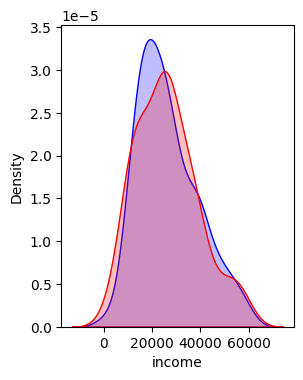

In [81]:
#Write your answer here
fig, ax = plt.subplots(figsize=(3,4), dpi=100)
sns.kdeplot(dataset['income'][dataset['married']=='YES'], fill=True, color="blue")
sns.kdeplot(dataset['income'][dataset['married']=='NO'], fill=True, color="red")

**The Council is also interested in assessing whether there is any statistically significant difference in income depending on the region citizens live. They want to give equal opportunities to all Yorkies irrespective of where they live.**

**TF14) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on location**

**Write your answer here**



**TF15) Calculate the degrees of freedom**

In [23]:
#Write your answer here


**TF16) Find the critical value for a test with significance level α=0.05**

In [24]:
#Write your answer here


**TF17) Perform the appropriate test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [25]:
#Write your answer here


**TF18) Plot a boxplot showing the income per region. Dooes the boxplot confirm your findings in task TF17?**

In [26]:
#Write your answer here


**The Council is also interested in assessing whether there is any statistically significant difference in income depending on the age of citizens. The Council considers the following age groups [17-29], [30,41], [42,53], [54,67]**

**TF19) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on these age groups**

**Write your answer here**

**TF20) Calculate the degrees of freedom**

In [27]:
#Write your answer here


**TF21)  Perform the appropriate test to evaluate the hypotheses for significance level $\alpha =0.05$. You may use the appropriate scipy.stats method.**

In [28]:
#Write your answer here


**TF22) Plot the distributions for the four age groups**

In [29]:
#Write your answer here


**TF23) Perform a post hoc analysis using the Bonferroni correction to identify the pairs which exhibit statistically significant difference**

In [30]:
#Write your answer here


**TF24) Plot a boxplot showing the income per age group**

In [31]:
#Write your answer here


***

## Should you want to practice at home, you could

* Go back to the previous practicals and run some statistical tests

* The formula for sample standard deviation is $s = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$
  Think about how you can demonstrate through simulation why $n-1$ (in the denominator) is appropriate; i.e., why not $n-2$, $n-3$ etc? For your information, this is called the Bessel's Correction.
